In [237]:
import pandas as pd 
import os 
from tqdm import tqdm
import json
import torch
import torch.nn as nn
"""
This program converts the multiple MIMIC-IV-ED files into one large dataframe
"""

os.chdir('/Users/arabdhabiswas/UCLA/Research/Chiang Lab 2023 Fall Rotation/EHR Project/physionet.org/files/')
path = '/Users/arabdhabiswas/UCLA/Research/Chiang Lab 2023 Fall Rotation/EHR Project/physionet.org/files/'
os.getcwd()



'/Users/arabdhabiswas/UCLA/Research/Chiang Lab 2023 Fall Rotation/EHR Project/physionet.org/files'

In [161]:
print("Loading ED Stays")
valid_dispositions = [
    'HOME', # 241632
    'ADMITTED', #158010
    # 'TRANSFER', # 7025
    # 'LEFT WITHOUT BEING SEEN', #6155
    # 'ELOPED', #5710
    # 'OTHER',  #4297
    # 'LEFT AGAINST MEDICAL ADVICE', #1881
    'EXPIRED' #377
]
edstays = pd.read_csv(os.path.join(path, 'ed/edstays.csv.gz'), compression='gzip')
edstays = edstays[edstays['disposition'].isin(valid_dispositions)]

print('loading triage')
triage = pd.read_csv(os.path.join(path, 'ed/triage.csv.gz'), compression='gzip')\
    .merge(edstays[['stay_id']], on='stay_id', how='inner')\

print('loading medrecon')
medrecon = pd.read_csv(os.path.join(path, 'ed/medrecon.csv.gz'), compression='gzip')\
    .merge(edstays[['stay_id']], on='stay_id', how='inner')\
    .sort_values(by='charttime')

print('loading pyxis')
pyxis = pd.read_csv(os.path.join(path, 'ed/pyxis.csv.gz'), compression='gzip')\
    .merge(edstays[['stay_id']], on='stay_id', how='inner')\
    .sort_values(by='charttime')
# %%
    
print('loading diagnosis')
diagnosis = pd.read_csv(os.path.join(path, 'ed/diagnosis.csv.gz'), compression='gzip')\
    .merge(edstays[['stay_id']], on='stay_id', how='inner')\
    .sort_values(by='seq_num')

Loading ED Stays
loading triage
loading medrecon
loading pyxis
loading diagnosis


In [211]:
# drop subject id

dataframes_ = [edstays,triage, medrecon, pyxis, diagnosis]

for j in range(len(dataframes_)):
    df = dataframes_[j]
    if 'subject_id' in df.columns:
        df.drop('subject_id', axis=1, inplace=True)

In [212]:
# Start by fixing Triage
# Filter columns with missing values (NAs)
missing_values = triage.isna().sum()

# Filter columns with missing values (NAs)
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values (NAs) and their data types:")
    for column_name in columns_with_missing_values.index:
        data_type = triage[column_name].dtype
        if data_type == float:
            median_value = triage[column_name].median()
            triage[column_name].fillna(median_value, inplace=True)
            
        else:
            #just for this one value for pain
            mode_value = triage[column_name].mode()
            triage[column_name].fillna(0, inplace=True)
            
else:
    print("No columns have missing values (NAs).")
#triage = pd.get_dummies(triage, columns=['chiefcomplaint'], drop_first=True)

No columns have missing values (NAs).


In [216]:
pyxis = pyxis[['stay_id', 'name']]
missing_values = pyxis.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values (NAs) and their data types:")
    for column_name in columns_with_missing_values.index:
        data_type = pyxis[column_name].dtype
        if data_type == float:
            median_value = pyxis[column_name].median()
            pyxis[column_name].fillna(median_value, inplace=True)
            
        else:
            #just for this one value for pain
            mode_value = pyxis[column_name].mode()
            pyxis[column_name].fillna(0, inplace=True)
            
else:
    print("No columns have missing values (NAs).")

pyxis_grouped = pyxis.groupby(['stay_id']).sum().reset_index()


unique_stay_ids = pyxis_grouped['stay_id'].nunique()
print(f'The number of unique ids in the pyxis DataFrame is: {unique_stay_ids}')


No columns have missing values (NAs).
The number of unique ids in the pyxis DataFrame is: 169


In [215]:
pyxis_grouped

stay_id                                               name
0    30094124  Lidocaine Viscous 2% 15mL UDCUPAluminum-Magnes...
1    30115213  Propofol 1000mg/100mL 100mL VIALPropofol 1000m...
2    30193781  Diazepam 10mg/2mL 2mL SYRDiazepam 10mg/2mL 2mL...
3    30225689  Ondansetron 4mg/2mL 2mL VIALOndansetron 4mg/2m...
4    30272878  Midazolam 100mg/100mL 100mL BagMidazolam 100mg...
..        ...                                                ...
164  39747335         Ibuprofen 600mg TABAcetaminophen 325mg TAB
165  39910144  HaloperidolHaloperidolMultivitaminsMultivitami...
166  39930808  AcetaminophenLorazepamOxyCODONE (Immediate Rel...
167  39962121  Oxycodone-Acetaminophen 1TAB TABCiprofloxa 400...
168  39968716                        CefTRIAXone (Mini Bag Plus)

[169 rows x 2 columns]

In [217]:
# Next Fix medrecon
import pandas as pd

# Assuming 'pyxis' is your DataFrame
# Assuming 'stay_id' is the column you want to count unique values for




medrecon = medrecon[['stay_id', 'name']]
missing_values = medrecon.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values (NAs) and their data types:")
    for column_name in columns_with_missing_values.index:
        data_type = medrecon[column_name].dtype
        if data_type == float:
            median_value = medrecon[column_name].median()
            medrecon[column_name].fillna(median_value, inplace=True)
            
        else:
            #just for this one value for pain
            mode_value = medrecon[column_name].mode()
            medrecon[column_name].fillna(0, inplace=True)
            
else:
    print("No columns have missing values (NAs).")

#medrecon = pd.get_dummies(medrecon, columns=['name'], drop_first=True)
medrecon_grouped = medrecon.groupby(['stay_id']).sum().reset_index()


unique_stay_ids = medrecon_grouped['stay_id'].nunique()
print(f'The number of unique medrecon in the medrecon DataFrame is: {unique_stay_ids}')


No columns have missing values (NAs).
The number of unique medrecon in the medrecon DataFrame is: 175


In [218]:
medrecon_grouped

stay_id                                               name
0    30094124  acyclovirdocusate sodiumsennosides [senna]feno...
1    30225689  spironolactoneoxycodonespironolactonecalcium c...
2    30279522  fenofibratefurosemideatorvastatinepinephrinetr...
3    30373795  cholecalciferol (vitamin D3)lisinoprilbisacody...
4    30667562  loratadinemelatoninloratadinefluticasoneloraze...
..        ...                                                ...
170  39866888                                          ibuprofen
171  39898790  zolpidemVitamin Dalprazolamomeprazole [Prilose...
172  39930808  fluoxetine [Prozac]lorazepam [Ativan]insulin g...
173  39962121  atorvastatinoxycodone-acetaminophenaspirinomep...
174  39968716  lisinoprilamiodaroneaspirinwarfarinmetoprolol ...

[175 rows x 2 columns]

In [166]:
# Lastly Fix diagnosis
diagnosis = diagnosis[['stay_id', 'icd_title']]

missing_values = diagnosis.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values (NAs) and their data types:")
    for column_name in columns_with_missing_values.index:
        data_type = diagnosis[column_name].dtype
        if data_type == float:
            median_value = diagnosis[column_name].median()
            diagnosis[column_name].fillna(median_value, inplace=True)
            
        else:
            #just for this one value for pain
            mode_value = diagnosis[column_name].mode()
            diagnosis[column_name].fillna(0, inplace=True)
            
else:
    print("No columns have missing values (NAs).")
#diagnosis = pd.get_dummies(diagnosis, columns=['icd_title'], drop_first=True)
diagnosis_grouped = diagnosis.groupby(['stay_id']).sum().reset_index()
unique_stay_ids = diagnosis_grouped['stay_id'].nunique()

print(f'The number of unique stay_ids in the diagnosis DataFrame is: {unique_stay_ids}')

The number of unique stay_ids in the diagnosis DataFrame is: 209


In [140]:
diagnosis_grouped

stay_id  icd_title_ABDOMINAL PAIN OTHER SPECIED  \
0    30094124                                       0   
1    30115213                                       0   
2    30193781                                       0   
3    30225689                                       0   
4    30272878                                       0   
..        ...                                     ...   
204  39898790                                       0   
205  39910144                                       0   
206  39930808                                       0   
207  39962121                                       0   
208  39968716                                       0   

     icd_title_ABDOMINAL PAIN UNSPEC SITE  icd_title_ABN CARDIOVASC STUDY NEC  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
204                                     0                                   0   
205                                     0                                   0   
206                                     0                                   0   
207                                     0                                   0   
208                                     0                                   0   

     icd_title_ABN REACT-PROCEDURE NOS  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
..                                 ...   
204                                  0   
205                                  0   
206                                  0   
207                                  0   
208                                  0   

     icd_title_ABNORMAL COAGULATION PROFILE  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
204                                       0   
205                                       0   
206                                       0   
207                                       0   
208                                       0   

     icd_title_AC ALCOHOL INTOX-UNSPEC  icd_title_ACCIDENT NOS  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
..                                 ...                     ...   
204                                  0                       0   
205                                  0                       0   
206                                  0                       0   
207                                  0                       0   
208                                  0                       0   

     icd_title_ACIDOSIS  icd_title_ACUTE APPENDICITIS NOS  ...  \
0                     0                                 0  ...   
1                     0                                 0  ...   
2                     0                                 0  ...   
3                     0                                 0  ...   
4                     0                                 0  ...   
..                  ...                               ...  ...   
204                   0

In [219]:
#fix edstayabss

edstays = edstays[['stay_id', 'disposition']]
edstays['disposition'].nunique()
value_mapping = {'ADMITTED': 0, 'HOME': 1}

# Use the replace() function to map values in the 'disposition' column
edstays['disposition'] = edstays['disposition'].replace(value_mapping)

In [221]:
dfs_to_merge = [edstays, triage, diagnosis_grouped, medrecon_grouped, pyxis_grouped]
merged_df = pd.merge(edstays, triage, on='stay_id', how='inner')
for dfs in dfs_to_merge[2:]:
    merged_df = pd.merge(merged_df, dfs, on='stay_id', how='inner')
merged_df

stay_id  disposition  temperature  heartrate  resprate  o2sat    sbp  \
0    37887480            0         99.1       90.0      26.0   98.0   86.0   
1    32103106            1         96.2       74.0      18.0  100.0  142.0   
2    38797992            0         99.2      130.0      32.0   94.0  106.0   
3    33473053            0         97.5      118.0      18.0   96.0  100.0   
4    32259573            1         98.1       89.0      18.0   96.0  131.0   
..        ...          ...          ...        ...       ...    ...    ...   
134  34205403            0         97.6      116.0      14.0   99.0  140.0   
135  31628990            0         99.0       87.0      18.0   96.0  126.0   
136  32405286            0         97.6      103.0      16.0   98.0  138.0   
137  34391979            0         98.0       90.0      18.0   98.0  135.0   
138  34161260            1         97.0      106.0      18.0   99.0  133.0   

      dbp    pain  acuity                          chiefcomplaint  \
0    61.0      10     1.0                                   FEVER   
1    75.0       0     2.0                           N/V, Tinnitus   
2    74.0       0     1.0                           SOB/ABNL LABS   
3    56.0       0     2.0                                      PE   
4    90.0      10     3.0                   Neck pain, Med refill   
..    ...     ...     ...                                     ...   
134  78.0  unable     3.0                      s/p Fall, Transfer   
135  68.0       0     3.0                              Chest pain   
136  72.0       0     2.0                      ? AORTIC DISECTION   
137  72.0     ett     1.0                Cardiac arrest, Transfer   
138  87.0       7     3.0  s/p Fall, R Wrist pain, R Wrist injury   

                                             icd_title  \
0    SEPTICEMIA NOSSEVERE SEPSIS ADV EFF MEDICINAL ...   
1                                   Tinnitus, left ear   
2    HYPOSMOLALITY/HYPONATREMIAPNEUMONIA,ORGANISM U...   
3    Other pulmonary embolism without acute cor pul...   
4                                          CERVICALGIA   
..                                                 ...   
134  Oth fracture of lower end of right tibia, init...   
135                     PNEUMONIA,ORGANISM UNSPECIFIED   
136  JOINT PAIN-SHLDERABN CARDIOVASC STUDY NECCAD U...   
137               Respiratory arrestOther pneumothorax   
138  FX LOW RADIUS W ULNA-CLFALL FROM OTHER SLIPPIN...   

                                                name_x  \
0    ibuprofendocusate sodium [Colace]hydromorphone...   
1    cholecalciferol (vitamin D3)atenololBayer Aspi...   
2    simvastatinmetoprolol tartrateLevaquinMucinexb...   
3                                  metoprolol tartrate   
4    aspirin [Enteric Coated Aspirin]cyanocobalamin...   
..                                                 ...   
134  Celexa*depakote DRtrazodoneSeroqueltrazodoneSe...   
135                                       multivitamin   
136  magnesium citrateaspirinaspirinNiacin Flush Fr...   
137  Mapap (acetaminophen)apixabanamlodipinecalcium...   
138  ZyprexaXiaflexzoster vaccine live (PF) [Zostav...   

                                                name_y  
0    LorazepamLorazepamLorazepamHYDROmorphone (Dila...  
1    Potassium Chloride 10mEq TABPotassium Chloride...  
2           VancomycinVancomycinAcetaminophen (Rectal)  
3                         Heparin SodiumHeparin Sodium  
4                        OxyCODONE (Immediate Release)  
..                                                 ...  
134  QUEtiapine Fumarate 100mg TABTraZODone 50mg TA...  
135  AcetaminophenVancomycinVancomycinOSELTAMivirLe...  
136                                    DiphenhydrAMINE  
137  NORepinephri 8mg/250mL 250mL BAGMidazolam 5mg/...  
138    IbuprofenOlanzapineDivalproex (DELayed Release)  

[139 rows x 14 columns]

In [466]:
import pandas as pd

# Assuming you have a DataFrame named merged_df

# Select columns with non-numeric data (object, string, etc.)
non_numeric_columns = merged_df.select_dtypes(exclude=['number'])

dummy_df = []

# Create dummy variables for the specified columns
dummy_df = pd.get_dummies(merged_df, columns=non_numeric_columns.columns, drop_first=True)
dummy_df

stay_id  disposition  temperature  heartrate  resprate  o2sat    sbp  \
0    37887480            0         99.1       90.0      26.0   98.0   86.0   
1    32103106            1         96.2       74.0      18.0  100.0  142.0   
2    38797992            0         99.2      130.0      32.0   94.0  106.0   
3    33473053            0         97.5      118.0      18.0   96.0  100.0   
4    32259573            1         98.1       89.0      18.0   96.0  131.0   
..        ...          ...          ...        ...       ...    ...    ...   
134  34205403            0         97.6      116.0      14.0   99.0  140.0   
135  31628990            0         99.0       87.0      18.0   96.0  126.0   
136  32405286            0         97.6      103.0      16.0   98.0  138.0   
137  34391979            0         98.0       90.0      18.0   98.0  135.0   
138  34161260            1         97.0      106.0      18.0   99.0  133.0   

      dbp  acuity  pain_0  ...  \
0    61.0     1.0       0  ...   
1    75.0     2.0       1  ...   
2    74.0     1.0       0  ...   
3    56.0     2.0       1  ...   
4    90.0     3.0       0  ...   
..    ...     ...     ...  ...   
134  78.0     3.0       0  ...   
135  68.0     3.0       1  ...   
136  72.0     2.0       1  ...   
137  72.0     1.0       0  ...   
138  87.0     3.0       0  ...   

     name_y_Sodium Chloride 0.9%  (Mini Bag Plus)Pantoprazole SodiumCefTRIAXoneCefTRIAXonePantoprazole SodiumOctreotide AcetateOctreotide Acetate  \
0                                                    0                                                                                              
1                                                    0                                                                                              
2                                                    0                                                                                              
3                                                    0                                                                                              
4                                                    0                                                                                              
..                                                 ...                                                                                              
134                                                  0                                                                                              
135                                                  0                                                                                              
136                                                  0                                                                                              
137                                                  0                                                                                              
138                                                  0                                                                                              

     name_y_Sulfameth/Trimeth DSSulfameth/Trimeth DSCephalexinAcetaminophen  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
134                                                  0                        
135                                                  0                        
136                                                  0                        
137                                                  0                        
13

In [480]:
model_df = dummy_df.drop('stay_id', axis=1)


labels = model_df['disposition']
features = model_df.drop('disposition', axis = 1)
#features = model_df[['temperature', 'heartrate', 'resprate', 'o2sat']]

In [481]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [482]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10000)
# Train the model on training data
rf.fit(train_features, train_labels);

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

In [483]:
predicted_labels = rf.predict(test_features)

# Assuming test_labels is the actual labels for your test data
# Calculate the accuracy or any other relevant evaluation metric
# For classification tasks, you can use metrics like accuracy, precision, recall, F1-score, etc.
from sklearn.metrics import accuracy_score

# Compare predicted_labels with test_labels
accuracy = accuracy_score(test_labels, predicted_labels)

# Print the accuracy or other evaluation metric
print("Accuracy:", accuracy)

from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Calculate AUC
auc_score = roc_auc_score(test_labels, predicted_labels)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, predicted_labels)

# Calculate the area under the Precision-Recall curve
pr_auc = auc(recall, precision)

# Print the AUC and Precision-Recall AUC
print("AUC:", auc_score)
print("Precision-Recall AUC:", pr_auc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Accuracy: 0.6785714285714286
AUC: 0.5
Precision-Recall AUC: 0.6607142857142857


disposition  temperature  heartrate  resprate  o2sat    sbp   dbp  \
0              0         99.1       90.0      26.0   98.0   86.0  61.0   
1              1         96.2       74.0      18.0  100.0  142.0  75.0   
2              0         99.2      130.0      32.0   94.0  106.0  74.0   
3              0         97.5      118.0      18.0   96.0  100.0  56.0   
4              1         98.1       89.0      18.0   96.0  131.0  90.0   
..           ...          ...        ...       ...    ...    ...   ...   
134            0         97.6      116.0      14.0   99.0  140.0  78.0   
135            0         99.0       87.0      18.0   96.0  126.0  68.0   
136            0         97.6      103.0      16.0   98.0  138.0  72.0   
137            0         98.0       90.0      18.0   98.0  135.0  72.0   
138            1         97.0      106.0      18.0   99.0  133.0  87.0   

     acuity  pain_0  pain_10  ...  \
0       1.0       0        1  ...   
1       2.0       1        0  ...   
2       1.0       0        0  ...   
3       2.0       1        0  ...   
4       3.0       0        1  ...   
..      ...     ...      ...  ...   
134     3.0       0        0  ...   
135     3.0       1        0  ...   
136     2.0       1        0  ...   
137     1.0       0        0  ...   
138     3.0       0        0  ...   

     name_y_Sodium Chloride 0.9%  (Mini Bag Plus)Pantoprazole SodiumCefTRIAXoneCefTRIAXonePantoprazole SodiumOctreotide AcetateOctreotide Acetate  \
0                                                    0                                                                                              
1                                                    0                                                                                              
2                                                    0                                                                                              
3                                                    0                                                                                              
4                                                    0                                                                                              
..                                                 ...                                                                                              
134                                                  0                                                                                              
135                                                  0                                                                                              
136                                                  0                                                                                              
137                                                  0                                                                                              
138                                                  0                                                                                              

     name_y_Sulfameth/Trimeth DSSulfameth/Trimeth DSCephalexinAcetaminophen  \
0                                                    0                        
1                                                    0                        
2                                                    0                        
3                                                    0                        
4                                                    0                        
..                                                 ...                        
134                                                  0                        
135                                                  0                        
136                                                  0                        
137                                                  0                        
138          

Empty DataFrame
Columns: [stay_id, disposition]
Index: []


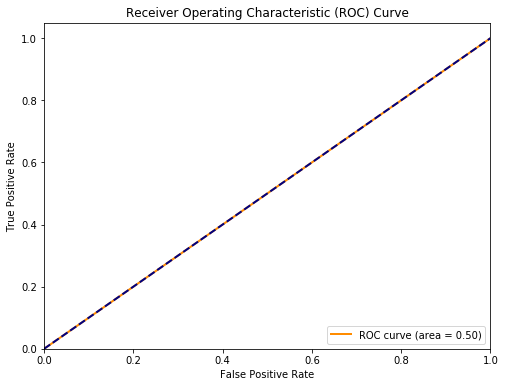

In [471]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have test_labels and predicted_labels from your model

# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, predicted_labels)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [472]:
from torch.utils.data import Dataset, DataLoader, random_split, default_collate


input_dim = 539
num_labels = 2
model = SelfAttentionPlus(input_dim)

train_features_tensor = torch.tensor(train_features.values, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels.values, dtype=torch.float32).reshape(-1, 1)
test_features_tensor = torch.tensor(test_features.values, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels.values, dtype=torch.float32).reshape(-1, 1)



class Model_Dataset(Dataset):
    def __init__(self, X, y):
        # convert into PyTorch tensors and remember them
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        # this should return the size of the dataset
        return len(self.X)
    def __getitem__(self, idx):
        # this should return one sample from the dataset
        features = self.X[idx]
        target = self.y[idx]
        return features, target
    
training_dataset = Model_Dataset(train_features_tensor, train_labels_tensor)
test_dataset = Model_Dataset(test_features_tensor, test_labels_tensor)
loader = DataLoader(training_dataset, shuffle=True, batch_size=100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [473]:
import torch.nn as nn
 
class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(539, 539)
        self.relu = nn.ReLU()
        self.hidden2 = nn.Linear(539, 128)
        self.relu = nn.ReLU()
        self.hidden3 = nn.Linear(128, 64)
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.sigmoid(self.output(x))
        return x

In [477]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


n_epochs = 100
model1 = Wide()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model1(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')
    


Finished epoch 0, latest loss 0.699717104434967
Finished epoch 1, latest loss 0.699717104434967
Finished epoch 2, latest loss 0.699717104434967
Finished epoch 3, latest loss 0.699717104434967
Finished epoch 4, latest loss 0.699717104434967
Finished epoch 5, latest loss 0.699717104434967
Finished epoch 6, latest loss 0.699717104434967
Finished epoch 7, latest loss 0.699717104434967
Finished epoch 8, latest loss 0.699717104434967
Finished epoch 9, latest loss 0.699717104434967
Finished epoch 10, latest loss 0.699717104434967
Finished epoch 11, latest loss 0.699717104434967
Finished epoch 12, latest loss 0.699717104434967
Finished epoch 13, latest loss 0.699717104434967
Finished epoch 14, latest loss 0.699717104434967
Finished epoch 15, latest loss 0.699717104434967
Finished epoch 16, latest loss 0.699717104434967
Finished epoch 17, latest loss 0.699717104434967
Finished epoch 18, latest loss 0.699717104434967
Finished epoch 19, latest loss 0.699717104434967
Finished epoch 20, latest loss

In [478]:
X_test, y_test = default_collate(test_dataset)
model1.eval()
y_pred = model1(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 50.00%


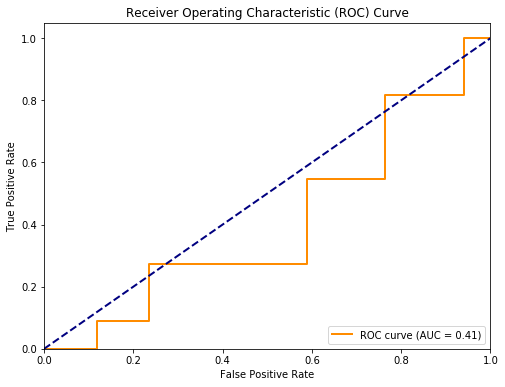

In [479]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your test_features_tensor and test_labels_tensor as defined in your code

# Make predictions using your model
with torch.no_grad():
    y_pred_prob = model1(test_features_tensor).numpy()

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels_tensor, y_pred_prob)

# Compute the ROC AUC (Area Under the Curve) score
roc_auc = roc_auc_score(test_labels_tensor, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [465]:
model_df[['disposition', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'acuity']]


disposition  heartrate  resprate  o2sat    sbp   dbp  acuity
0              0       90.0      26.0   98.0   86.0  61.0     1.0
1              1       74.0      18.0  100.0  142.0  75.0     2.0
2              0      130.0      32.0   94.0  106.0  74.0     1.0
3              0      118.0      18.0   96.0  100.0  56.0     2.0
4              1       89.0      18.0   96.0  131.0  90.0     3.0
..           ...        ...       ...    ...    ...   ...     ...
134            0      116.0      14.0   99.0  140.0  78.0     3.0
135            0       87.0      18.0   96.0  126.0  68.0     3.0
136            0      103.0      16.0   98.0  138.0  72.0     2.0
137            0       90.0      18.0   98.0  135.0  72.0     1.0
138            1      106.0      18.0   99.0  133.0  87.0     3.0

[139 rows x 7 columns]